# Latar Belakang
Perilaku pelanggan di supermarket semakin beragam, baik dalam preferensi produk, frekuensi pembelian, maupun respons terhadap kampanye pemasaran. Meskipun berbagai marketing campaign telah dijalankan, hasil yang diperoleh belum optimal. Hal ini menunjukkan bahwa pendekatan pemasaran yang digunakan belum sepenuhnya tepat sasaran.

Untuk meningkatkan efektivitas kampanye, perusahaan membutuhkan pendekatan berbasis data yang mampu mengelompokkan pelanggan berdasarkan karakteristik dan pola belanja mereka. Dengan segmentasi yang tepat, perusahaan dapat merancang strategi pemasaran yang lebih relevan, efisien, dan berdampak besar terhadap peningkatan penjualan dan loyalitas pelanggan.

## Pernyataan Masalah
Sebuah supermarket bernama **IndoAlfa** ingin mengetahui segmen pelanggan seperti apa yang paling responsif terhadap kampanye pemasaran, serta bagaimana karakteristik tiap segmen dapat digunakan untuk menyusun strategi yang lebih efektif. Informasi ini akan membantu perusahaan dalam meningkatkan relevansi kampanye, mengoptimalkan biaya pemasaran, dan memperkuat hubungan jangka panjang dengan pelanggan.

Tujuan utama analisis ini adalah untuk memahami pola perilaku pelanggan melalui customer segmentation, serta mengevaluasi efektivitas campaign. Dengan segmentasi ini, perusahaan dapat mengidentifikasi kelompok pelanggan bernilai tinggi, segmen yang menunjukkan potensi churn, serta target yang paling tepat untuk kampanye tertentu.

Saya akan mencoba menjawab pertanyaan berikut:

**Bagaimana segmentasi pelanggan berdasarkan demografi dan perilaku belanja dapat membantu meningkatkan efektivitas kampanye pemasaran?**


# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://drive.google.com/file/d/1uiBK9Ngzqe8pSg-5-7jFZ7tlCFpL0HWj/view?usp=sharing). 

Segmentation menggunakan metode LRFM + K-Means clustering.

Penilaian efektivitas kampanye dianalisis berdasarkan acceptance rate pada masing-masing cluster.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
import statsmodels.api as sm
import pylab
import warnings
from sklearn.cluster import KMeans
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Supermarket Customers.csv', sep='\t')
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi dari dataset Supermarket Customers.csv.

In [3]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-nul

In [4]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

Dataset ini berisi informasi terkait demografi pelanggan, perilaku pembelian, serta respons pelanggan terhadap beberapa kampanye pemasaran. Data ini dapat digunakan untuk melakukan segmentasi pelanggan dan mengevaluasi efektivitas kampanye.

Ada 29 kolom di dalam dataset supermarket_customers, yaitu:


* ID : ID unik untuk tiap pelanggan
* Year_Birth : tahun kelahiran pelanggan
* Education : tingkat pendidikan
* Marital_Status : status pernikahan
* Income : total pendapatan tahunan pelanggan
* Kidhome : jumlah anak kecil dalam rumah tangga
* Teenhome : jumlah remaja dalam rumah tangga
* Dt_Customer : tanggal pertama pelanggan bergabung
* Recency : jumlah hari sejak terakhir kali pelanggan melakukan pembelian

* MntWines : total pengeluaran untuk wine
* MntFruits : total pengeluaran untuk buah
* MntMeatProducts : total pengeluaran untuk produk daging
* MntFishProducts : total pengeluaran untuk produk ikan
* MntSweetProducts : total pengeluaran untuk produk manis
* MntGoldProds : total pengeluaran untuk produk emas/perhiasan

* NumDealsPurchases : jumlah pembelian menggunakan diskon
* NumWebPurchases : jumlah pembelian via web
* NumCatalogPurchases : jumlah pembelian via katalog
* NumStorePurchases : jumlah pembelian di toko fisik
* NumWebVisitsMonth : jumlah kunjungan ke website dalam sebulan

* AcceptedCmp1 : respons pelanggan terhadap kampanye 1 (0/1)
* AcceptedCmp2 : respons pelanggan terhadap kampanye 2 (0/1)
* AcceptedCmp3 : respons pelanggan terhadap kampanye 3 (0/1)
* AcceptedCmp4 : respons pelanggan terhadap kampanye 4 (0/1)
* AcceptedCmp5 : respons pelanggan terhadap kampanye 5 (0/1)
* Response : respons pelanggan terhadap kampanye terakhir (0 = tidak, 1 = iya)

* Complain : apakah pelanggan pernah membuat komplain
* Z_CostContact : nilai cost standar (konstan, tidak informatif)
* Z_Revenue : nilai revenue standar (konstan, tidak informatif)

In [5]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [6]:
pd.set_option('display.max_colwidth', None)
# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 3

In [7]:
# Mengecek missing value

df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Setelah melihat data-data di atas, bisa disimpulkan bahwa:
* dataset Supermarket Customer memiliki 29 kolom dan 2.240 baris
* Hanya ada satu kolom yang memiliki data kosong, yaitu, `Income`, dan  diwakili dengan data NaN (berjumlah 24).
* kolom `Dt_Customer` bertipe object, seharusnya kolom ini bertipe datetime. Kolom ini akan diubah dan juga harus dicek apakah format tanggalnya sudah sesuai atau belum.
* kolom ``Z_CostContact` dan `Z_Revenue` akan di-drop karena hanya memiliki 1 nilai unik yang berarti tidak signifikan terhadap data.
* kolom `Income` memiliki data tipe float, setelah dilakukan pengecekan, kolom tersebut bisa diubah menjadi integer karena semua adalah bilangan bulat.
* diperlukan penambahan kolom `Age` untuk mengidentifikasi umur dari customers.
* diperlukan penambahan kolom `Year_Customer` untuk menghitung lama keterlibatan konsumen.
* diperlukan penambahan kolom `Total_Spending`, `Total_Purchase`, `Total_Campaign_Acc` untuk melakukan analisis perilaku belanja pelanggan secara menyeluruh serta melihat keterlibatan mereka dalam program promosi. Dengan adanya kolom–kolom ini, proses segmentasi konsumen serta evaluasi efektivitas kampanye pemasaran dapat dilakukan lebih akurat
* Terdapat anomali pada kolom `Year_Birth` di mana ada tahun lahir 1893 yang berarti usianya 121 tahun.
* Terdapat anomali pada kolom `Income` di mana ada orang dengan income 666.666, terlalu jauh dari yang lain.

### Missing Value

In [8]:
# Cek proporsi missing value
(df.isnull().sum() / len(df)) * 100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

In [9]:
#Menampilkan baris-baris yang memiliki missing value

df[df.isnull().any(axis=1)] 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


<Axes: >

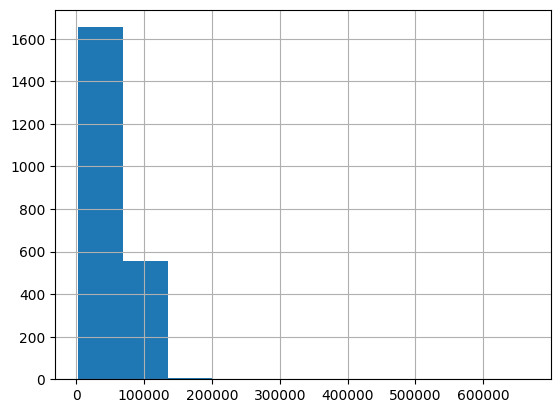

In [10]:
#Memeriksa apakah Income berdistribusi normal atau tidak
df['Income'].hist()

Missing value pada kolom Income memiliki proporsi yang sangat kecil, yaitu sekitar 1.07%. Dengan proporsi yang rendah ini, terdapat dua pendekatan yang sama-sama layak dilakukan. Pertama, baris yang memiliki missing value dapat dihapus karena efeknya terhadap ukuran sampel dan distribusi data sangat minimal. Kedua, nilai yang hilang dapat diimputasi menggunakan median untuk menjaga konsistensi jumlah data tanpa menimbulkan bias yang signifikan. Dalam kasus ini, kita akan mengisi missing value dengan median. Pertimbangannya juga adalah karena Income tidak berdistribusi normal.

#### Handling Missing Value

In [11]:
# Membuat salinan dataframe agar data asli tidak berubah-ubah

df_cleansing = df.copy()

In [12]:
df_cleansing[['Income']] = df_cleansing[['Income']].fillna(df_cleansing[['Income']].median())
df_cleansing.isnull().sum(0)

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [13]:
# Mengubah tipe data untuk kolom Income
df_cleansing['Income'] = df_cleansing['Income'].astype(int)
df_cleansing.dtypes


ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
Income                  int64
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Complain                int64
Z_CostContact           int64
Z_Revenue               int64
Response                int64
dtype: object

In [14]:
# Memeriksa Missing Value
df_cleansing.isnull().sum()


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [15]:
#Menghapus kolom yang tidak diperlukan

df_cleansing.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [16]:
# Cek duplicate
df.duplicated().any()

np.False_

Missing value pada kolom Income sudah diganti dengan nilai median dari Income. Lalu kolom Income sudah diubah menjadi tipe integer.

Kolom ID, Z_CostContact, Z_Revenue sudah di-drop.  Tidak ada data duplicate dari dataset ini.

#### Handling Datetime Value

In [17]:
# Error
# df_cleansing['Dt_Customer'] = pd.to_datetime(df_cleansing['Dt_Customer'])

Muncul pesan error karena ada dua format penanggalan dalam kolom `Dt_Customer`. Format yang digunakan adalah "%m-%d-%Y" dan "%d-%y-%Y" sehingga baris dengan format "%d-%y-%Y" akan dianggap salah karena tanggal bisa lebih dari 12, sementara seharusnya bulan itu maksimal 12.

In [18]:
df_cleansing['Dt_Customer'] = pd.to_datetime(
    df_cleansing['Dt_Customer'],
    format='mixed',
    dayfirst=True
)
df_cleansing

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223,0,1,2013-06-13,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014,2,1,2014-06-10,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981,0,0,2014-01-25,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245,0,1,2014-01-24,8,428,...,5,10,3,0,0,0,0,0,0,0


Untuk mempermudah, kita gunakan format='mixed' karena membuatnya lebih fleksibel untuk multiple date format.

#### Outlier

Dalam tahap ini, kita akan memerika outliers dalam dataset ini dan juga melakukan penanganan, entah dihapus atau dibiarkan.

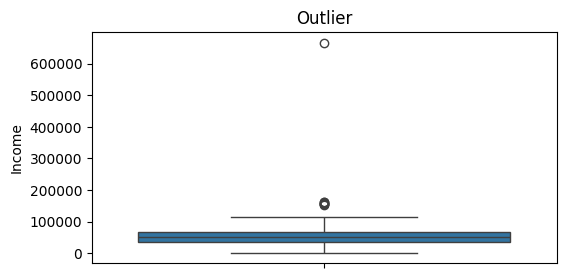

Jumlah Outlier: 8
Nilai Outlier:
[157243 162397 153924 160803 157733 157146 156924 666666]


In [19]:
# Boxplot Income
plt.figure(figsize=(6, 3))
sns.boxplot(data=df_cleansing['Income'])
plt.xticks(rotation=30)
plt.title("Outlier")
plt.show()

# Menampilkan value outlier
Q1 = df_cleansing['Income'].quantile(0.25)
Q3 = df_cleansing['Income'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outlier_value = df_cleansing.loc[(df_cleansing['Income'] < lower) | (df_cleansing['Income'] > upper), 'Income']

print("Jumlah Outlier:", outlier_value.shape[0])
print("Nilai Outlier:")
print(outlier_value.values) 


In [20]:
df_cleansing[df_cleansing['Income'] != 666666]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223,0,1,2013-06-13,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014,2,1,2014-06-10,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981,0,0,2014-01-25,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245,0,1,2014-01-24,8,428,...,5,10,3,0,0,0,0,0,0,0


In [21]:
#Menghapus baris dengan value Income 666666
df_cleansing = df_cleansing[df_cleansing['Income'] <666666]
df_cleansing[df_cleansing['Income'] > 666666]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


Nilai income 666.666 terdeteksi sebagai outlier ekstrem karena berada sangat jauh di luar distribusi normal pelanggan dan tidak realistis dibandingkan mayoritas data. Outlier ini berpotensi mengganggu proses analisis karena bisa menggeser mean yang nantinya menyebabkan hasil clustering menjadi bias. Oleh karena itu, nilai tersebut dihapus untuk menjaga integritas data dan kestabilan model. Kemungkinan ada kesalahan input atau memang di-input secara asal/bercanda karena angkanya spesifik 666.666.

Sementara itu, nilai-nilai Income outlier yang masih berada di bawah 200.000 tidak di-drop karena dirasa masih masuk akal jika ada orang-orang yang memiliki penghasilan lebih besar dari kebanyakan orang. Nilai-nilai ini juga tidak mengganggu distribusi secara signifikan.

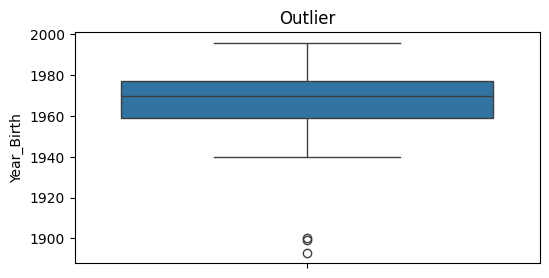

Jumlah Outlier: 3
Nilai Outlier:
[1900 1893 1899]


In [22]:
# Boxplot Year_Birth
plt.figure(figsize=(6, 3))
sns.boxplot(data=df_cleansing['Year_Birth'])
plt.xticks(rotation=30)
plt.title("Outlier")
plt.show()

# Menampilkan value outlier
Q1 = df_cleansing['Year_Birth'].quantile(0.25)
Q3 = df_cleansing['Year_Birth'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outlier_value = df_cleansing.loc[(df_cleansing['Year_Birth'] < lower) | (df_cleansing['Year_Birth'] > upper), 'Year_Birth']

print("Jumlah Outlier:", outlier_value.shape[0])
print("Nilai Outlier:")
print(outlier_value.values) 


Ditemukan outlier ekstrem pada variabel **Year_Birth** dengan rentang tahun kelahiran 1893–1900 yang merepresentasikan usia lebih dari 110 tahun. Nilai ini tidak realistis untuk populasi pelanggan aktif dan sangat mungkin merupakan error input atau noise dalam data. Untuk menjaga kualitas analisis serta menghindari distorsi pada distribusi umur dan hasil clustering, observasi dengan nilai tersebut **dihapus dari dataset**.


In [23]:
df_cleansing[df_cleansing['Year_Birth'] < 1920]
df_cleansing = df_cleansing[df_cleansing['Year_Birth'] > 1920]
df_cleansing[df_cleansing['Year_Birth'] < 1920]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


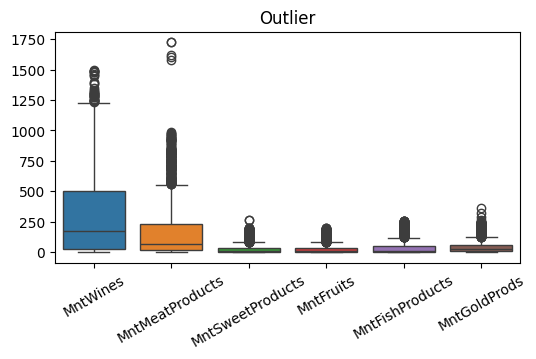

📌 Outlier pada MntWines: 35 values
[1332, 1349, 1241, 1285, 1248, 1239, 1396, 1288, 1379, 1478, 1492, 1492, 1279, 1308, 1478, 1253, 1394, 1296, 1285, 1230, 1315, 1298, 1302, 1449, 1259, 1252, 1459, 1493, 1324, 1285, 1462, 1276, 1245, 1486, 1311] 

📌 Outlier pada MntMeatProducts: 174 values
[1725, 801, 780, 925, 779, 568, 690, 812, 951, 590, 921, 756, 1582, 813, 740, 757, 768, 565, 573, 561, 570, 832, 785, 818, 815, 786, 591, 716, 792, 974, 594, 613, 670, 925, 761, 940, 797, 635, 592, 572, 732, 713, 653, 758, 711, 838, 1622, 559, 597, 706, 617, 742, 689, 898, 706, 597, 747, 804, 774, 929, 845, 569, 838, 685, 873, 674, 890, 704, 606, 790, 925, 651, 708, 640, 733, 961, 568, 780, 678, 842, 843, 711, 818, 864, 750, 731, 604, 915, 689, 801, 913, 946, 672, 611, 687, 842, 622, 790, 717, 573, 984, 694, 595, 672, 573, 601, 731, 717, 687, 815, 706, 724, 827, 560, 701, 915, 639, 573, 625, 649, 832, 575, 599, 1725, 768, 673, 850, 835, 936, 935, 853, 558, 751, 693, 629, 981, 586, 565, 697, 736, 602,

In [24]:
# Boxplot Amount Spent
amount = ['MntWines','MntMeatProducts','MntSweetProducts','MntFruits','MntFishProducts', 'MntGoldProds']
plt.figure(figsize=(6, 3))
sns.boxplot(data=df_cleansing[amount])
plt.xticks(rotation=30)
plt.title("Outlier")
plt.show()

# Menampilkan value outlier

Q1 = df_cleansing[amount].quantile(0.25)
Q3 = df_cleansing[amount].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

outliers = {}

for col in amount:
    outlier_values = df_cleansing[(df_cleansing[col] < lower[col]) | (df_cleansing[col] > upper[col])][col]
    outliers[col] = outlier_values.tolist()

# tampilkan hasil
for k,v in outliers.items():
    print(f"📌 Outlier pada {k}: {len(v)} values")
    print(v, "\n")


Outlier pada variabel pembelian (MntWines, MntMeatProducts, dan lainnya) dibiarkan karena jumlahnya cukup besar dan bisa jadi merepresentasikan pelanggan high spender. Menghapusnya berisiko menghilangkan segmen bernilai tinggi dalam analisis segmentasi.

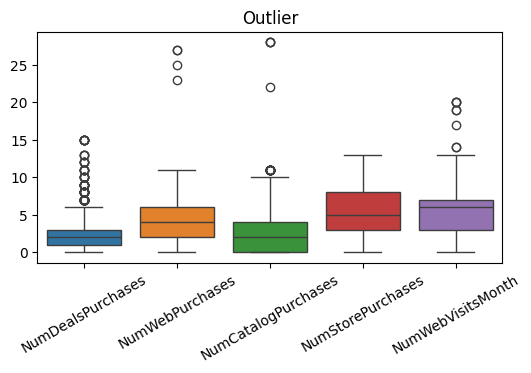

📌 Outlier pada NumDealsPurchases: 86 values
[15, 7, 9, 7, 7, 12, 7, 15, 8, 10, 9, 7, 13, 7, 7, 9, 9, 15, 7, 7, 7, 7, 7, 7, 7, 15, 7, 8, 7, 8, 7, 7, 7, 8, 8, 7, 7, 7, 7, 15, 11, 8, 7, 7, 12, 10, 12, 15, 10, 8, 7, 11, 8, 7, 7, 7, 10, 7, 7, 13, 9, 12, 7, 11, 7, 7, 9, 8, 9, 13, 9, 8, 11, 15, 11, 8, 7, 8, 10, 8, 7, 7, 7, 7, 8, 7] 

📌 Outlier pada NumWebPurchases: 4 values
[27, 23, 27, 25] 

📌 Outlier pada NumCatalogPurchases: 23 values
[28, 11, 22, 11, 11, 11, 11, 11, 28, 11, 11, 11, 11, 11, 11, 11, 11, 28, 11, 11, 11, 11, 11] 

📌 Outlier pada NumStorePurchases: 0 values
[] 

📌 Outlier pada NumWebVisitsMonth: 8 values
[20, 20, 14, 19, 20, 17, 14, 19] 



In [25]:
# Boxplot Purchase
purchase = ['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
plt.figure(figsize=(6, 3))
sns.boxplot(data=df_cleansing[purchase])
plt.xticks(rotation=30)
plt.title("Outlier")
plt.show()

# Menampilkan value outlier
Q1 = df_cleansing[purchase].quantile(0.25)
Q3 = df_cleansing[purchase].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

outliers = {}

for col in purchase:
    outlier_values = df_cleansing[(df_cleansing[col] < lower[col]) | (df_cleansing[col] > upper[col])][col]
    outliers[col] = outlier_values.tolist()

# tampilkan hasil
for k,v in outliers.items():
    print(f"📌 Outlier pada {k}: {len(v)} values")
    print(v, "\n")


Semua outlier pada variabel pembelian dan aktivitas tetap dipertahankan karena dianggap merepresentasikan pelanggan aktif dengan tingkat transaksi tinggi, yang berpotensi menjadi target kampanye bernilai. Nilai ekstrem ini justru memberikan informasi penting dalam Customer Segmentation dan berkontribusi pada analisis Campaign Effectiveness, sehingga penghapusannya dapat menghilangkan insight strategis terkait segmen high-value customer.

# LRFM Feature Engineering

Pada data awal, beberapa variabel masih berdiri sendiri sehingga belum memberikan informasi yang komprehensif terkait perilaku pelanggan. Untuk meningkatkan kualitas analisis serta memperjelas pola konsumsi dan aktivitas customer, dilakukan proses feature engineering guna membentuk fitur LRFM yang lebih representatif dan siap digunakan dalam tahap EDA lanjutan maupun algoritma clustering. Dengan adanya transformasi variabel menjadi metrik yang lebih terukur, analisis dapat dilakukan secara lebih tajam dan relevan terhadap kebutuhan bisnis.

Pada tahap ini dibentuk empat fitur utama LRFM (Recency, Length, Frequency, Monetary) untuk merepresentasikan perilaku pelanggan secara lebih ringkas dan bermakna. Recency menunjukkan seberapa baru pelanggan terakhir bertransaksi, Length menggambarkan durasi keterikatan pelanggan dengan perusahaan, Frequency mengukur intensitas pembelian, dan Monetary/Total Spending menunjukkan nilai total transaksi yang telah dilakukan. Keempat fitur ini digunakan sebagai dasar analisis segmentasi agar pola konsumsi dan karakteristik pelanggan dapat dipahami lebih jelas.

In [26]:
# Membuat kolom baru untuk nantinya dikurangi dengan kolom Year_Birth agar bisa mendapatkan usia customer
df_cleansing['Year'] = df_cleansing['Dt_Customer'].dt.year
df_cleansing.head()
df_cleansing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2236 non-null   int64         
 1   Year_Birth           2236 non-null   int64         
 2   Education            2236 non-null   object        
 3   Marital_Status       2236 non-null   object        
 4   Income               2236 non-null   int64         
 5   Kidhome              2236 non-null   int64         
 6   Teenhome             2236 non-null   int64         
 7   Dt_Customer          2236 non-null   datetime64[ns]
 8   Recency              2236 non-null   int64         
 9   MntWines             2236 non-null   int64         
 10  MntFruits            2236 non-null   int64         
 11  MntMeatProducts      2236 non-null   int64         
 12  MntFishProducts      2236 non-null   int64         
 13  MntSweetProducts     2236 non-null   i

In [27]:
df_cleansing['Year'] = df_cleansing['Year'].astype(int)
df_cleansing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2236 non-null   int64         
 1   Year_Birth           2236 non-null   int64         
 2   Education            2236 non-null   object        
 3   Marital_Status       2236 non-null   object        
 4   Income               2236 non-null   int64         
 5   Kidhome              2236 non-null   int64         
 6   Teenhome             2236 non-null   int64         
 7   Dt_Customer          2236 non-null   datetime64[ns]
 8   Recency              2236 non-null   int64         
 9   MntWines             2236 non-null   int64         
 10  MntFruits            2236 non-null   int64         
 11  MntMeatProducts      2236 non-null   int64         
 12  MntFishProducts      2236 non-null   int64         
 13  MntSweetProducts     2236 non-null   i

Untuk keperluan segmentasi konsumen, dibutuhkan informasi usia dari konsumen dan lamanya mereka menjadi pelanggan. Untuk usia bisa didapat dari mengurangi tahun maksimal dari kolom `Dt_Costumer` dengan kolom `Year_Birth`.

In [28]:
df_cleansing['Age'] = 2014 - df_cleansing['Year_Birth']
df_cleansing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Year,Age
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,1,2012,57
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,0,2014,60
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,0,2013,49
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,0,2014,30
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,0,2014,33


**Length**

Untuk menghitung lama keterlibatan pelanggan (customer tenure), digunakan selisih antara tanggal terakhir pada dataset dengan tanggal pertama pelanggan bergabung (Dt_Customer). Perhitungan dilakukan berbasis hari (days/365) agar hasil lebih akurat dibanding hanya menggunakan selisih tahun. Variabel ini digunakan sebagai indikator loyalitas pelanggan dan sebagai fitur untuk segmentasi.

In [29]:
last_date = df_cleansing['Dt_Customer'].max()
last_date

df_cleansing['Length'] = ((last_date - df_cleansing['Dt_Customer']).dt.days) 
df_cleansing['Length'] = df_cleansing['Length']
df_cleansing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Year,Age,Length
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,1,2012,57,663
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,0,2014,60,113
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,0,2013,49,312
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,0,2014,30,139
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,0,2014,33,161


**Frequency**



In [30]:
df_cleansing['Frequency'] = df_cleansing[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

**Monetary**

In [31]:
df_cleansing['Total_Spending'] = df_cleansing[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

Recency tidak perlu dibuat lagi karena sudah ada secara bawaan dari dataset.

In [32]:
df_cleansing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2236 non-null   int64         
 1   Year_Birth           2236 non-null   int64         
 2   Education            2236 non-null   object        
 3   Marital_Status       2236 non-null   object        
 4   Income               2236 non-null   int64         
 5   Kidhome              2236 non-null   int64         
 6   Teenhome             2236 non-null   int64         
 7   Dt_Customer          2236 non-null   datetime64[ns]
 8   Recency              2236 non-null   int64         
 9   MntWines             2236 non-null   int64         
 10  MntFruits            2236 non-null   int64         
 11  MntMeatProducts      2236 non-null   int64         
 12  MntFishProducts      2236 non-null   int64         
 13  MntSweetProducts     2236 non-null   i

# Data Analysis

### Demografi Pelanggan

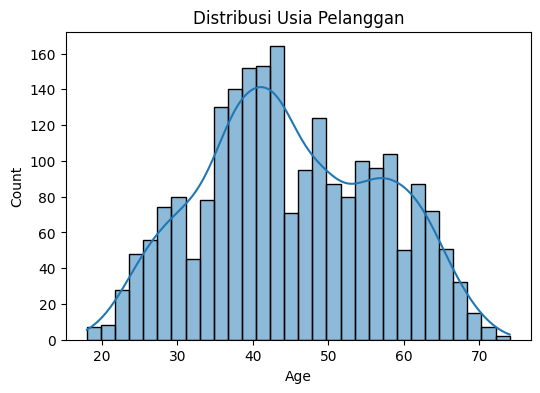

In [33]:
# Distribusi Age

plt.figure(figsize=(6,4))
sns.histplot(df_cleansing['Age'], bins=30, kde=True)
plt.title("Distribusi Usia Pelanggan")
plt.show()

Sebagian besar pelanggan berada pada rentang usia 35–60 tahun, menunjukkan dominasi kelompok usia produktif. Segmen usia muda dan sangat tua jumlahnya jauh lebih sedikit

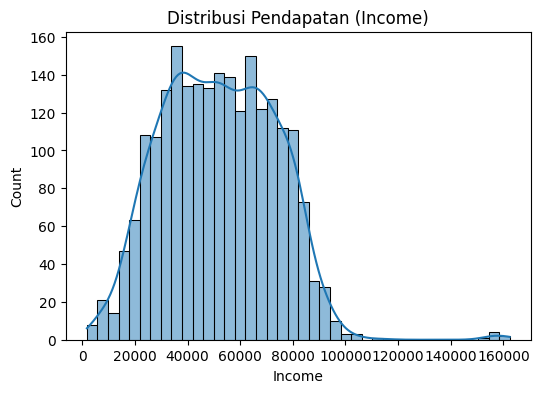

In [34]:
# Distribusi Pendapatan (Income)
plt.figure(figsize=(6,4))
sns.histplot(df_cleansing['Income'], bins=40, kde=True)
plt.title("Distribusi Pendapatan (Income)")
plt.show()

Distribusi condong ke kanan (right-skewed) → mayoritas pelanggan memiliki pendapatan menengah.

Outlier extreme seperti 666666 sudah dibersihkan sebelumnya sehingga distribusi lebih stabil untuk clustering.

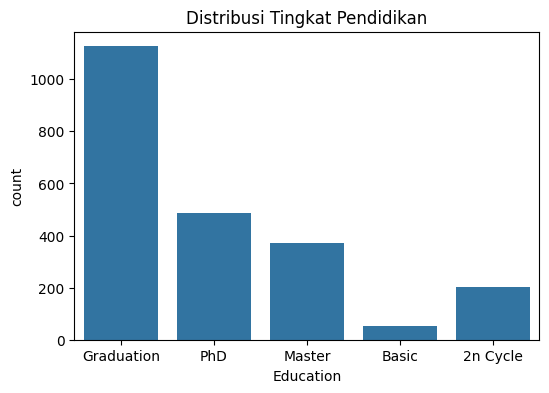

In [35]:
# Distribusi Tingkat Pendidikan
plt.figure(figsize=(6,4))
sns.countplot(x='Education', data=df_cleansing)
plt.title("Distribusi Tingkat Pendidikan")
plt.show()

Mayoritas pelanggan berasal dari kelompok Education = Graduation, diikuti oleh Master dan PhD, sehingga dapat disimpulkan bahwa basis pelanggan didominasi oleh individu dengan tingkat pendidikan yang relatif tinggi.

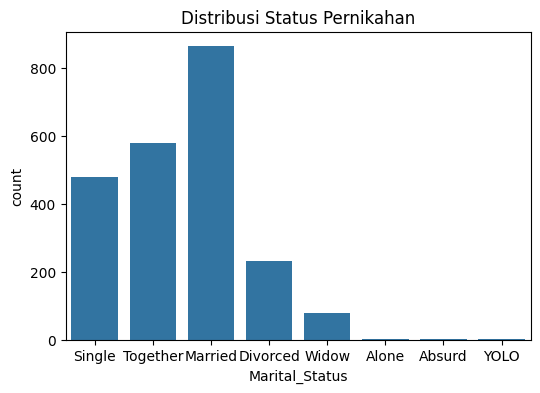

In [36]:
# Distribusi Status Pernikahan

plt.figure(figsize=(6,4))
sns.countplot(x='Marital_Status', data=df_cleansing)
plt.title("Distribusi Status Pernikahan")
plt.show()

Mayoritas pelanggan berada pada status Married, disusul oleh Together, kemudian Single. Komposisi ini menunjukkan bahwa sebagian besar pelanggan merupakan individu yang telah berpasangan/berkeluarga, di mana kebutuhan konsumsi cenderung lebih besar dan stabil dibanding status lain.

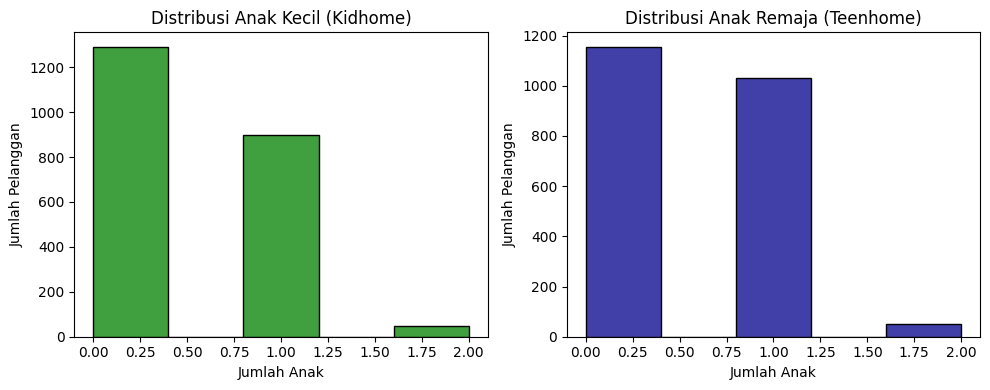

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.histplot(df_cleansing['Kidhome'], bins=5, ax=axes[0], color='green')
axes[0].set_title("Distribusi Anak Kecil (Kidhome)")

sns.histplot(df_cleansing['Teenhome'], bins=5, ax=axes[1], color='darkblue')
axes[1].set_title("Distribusi Anak Remaja (Teenhome)")

for ax in axes:
    ax.set_xlabel("Jumlah Anak")
    ax.set_ylabel("Jumlah Pelanggan")

plt.tight_layout()
plt.show()


Mayoritas pelanggan tidak memiliki anak kecil (Kidhome = 0) atau hanya memiliki 1 anak kecil. Sementara pada kategori remaja (Teenhome), distribusi juga didominasi oleh pelanggan yang memiliki 0–1 anak remaja. Jumlah pelanggan dengan 2 anak tergolong sangat kecil pada kedua kategori, sehingga dapat disimpulkan bahwa pelanggan umumnya berasal dari keluarga kecil atau pasangan dengan beban tanggungan anak yang relatif rendah. Kondisi ini berpotensi memengaruhi pola belanja, di mana kebutuhan konsumsi lebih cenderung fokus pada kebutuhan personal dan keluarga inti ketimbang kebutuhan rumah tangga besar dengan banyak anak.

### Perilaku Belanja

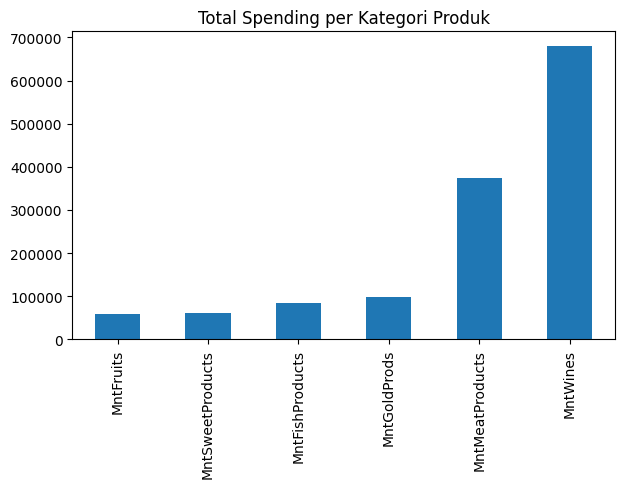

In [38]:
# Total Spending per Produk

spend_prod = ['MntWines','MntMeatProducts','MntSweetProducts','MntFruits','MntFishProducts','MntGoldProds']
df_cleansing[spend_prod].sum().sort_values().plot(kind='bar', figsize=(7,4))
plt.title("Total Spending per Kategori Produk")
plt.show()

Kategori Wine dan Meat Products adalah penyumbang belanja terbesar.

Produk Fish & Gold Products berada di tengah, sedangkan Fruits dan Sweet adalah pembelian paling jarang.

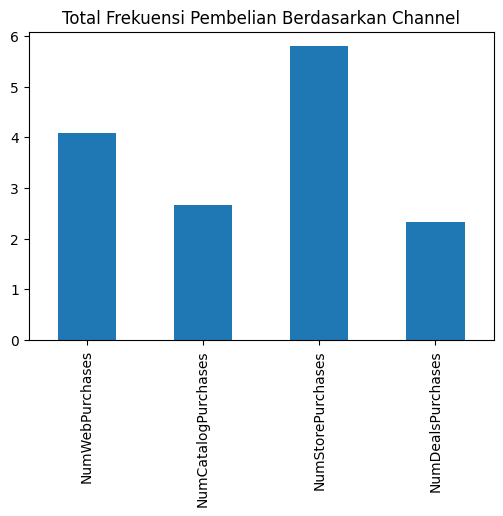

In [39]:
#Frekuensi Pembelian Berdasarkan Channel
freq_cols = ['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumDealsPurchases']
df_cleansing[freq_cols].mean().plot(kind='bar', figsize=(6,4))
plt.title("Total Frekuensi Pembelian Berdasarkan Channel")
plt.show()


Pembelian langsung di toko (in-store) paling dominan.

Pembelian berbasis web cukup signifikan.

Pembelian melalui katalog relatif rendah dan berpotensi untuk dikembangkan.

### Distribusi LRFM

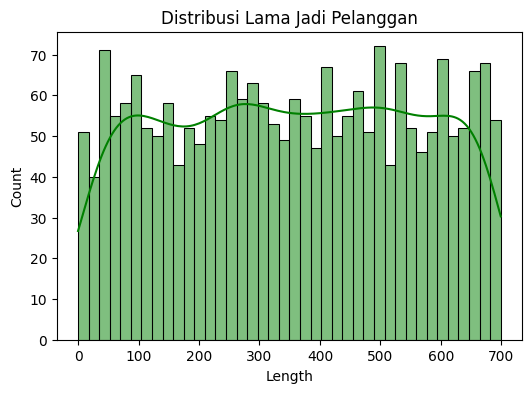

In [40]:
# Distribusi Length

plt.figure(figsize=(6,4))
sns.histplot(df_cleansing['Length'], bins=40, kde=True, color='green')
plt.title("Distribusi Lama Jadi Pelanggan")
plt.show()


Pelanggan memiliki sebaran Length yang cukup merata. Rentang Length berada di antara 1 hingga 700 hari, dan distribusi tidak terpusat pada periode tertentu. Ini berarti proporsi pelanggan baru dan lama relatif seimbang. Umur membership saja tidak cukup untuk menilai kualitas pelanggan.

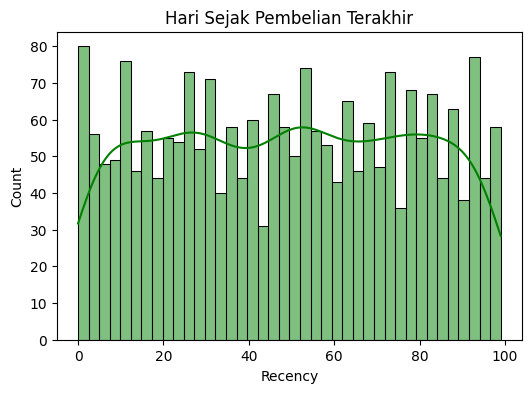

In [41]:
# Distribusi Recency

plt.figure(figsize=(6,4))
sns.histplot(df_cleansing['Recency'], bins=40, kde=True, color='green')
plt.title("Hari Sejak Pembelian Terakhir")
plt.show()

Recency berkisar antara 0 hingga 100 hari dan pola distribusi terlihat cukup merata di hampir seluruh rentang nilai. Berarti proporsi pelanggan aktif dan pelanggan yang tidak aktif relatif seimbang. 

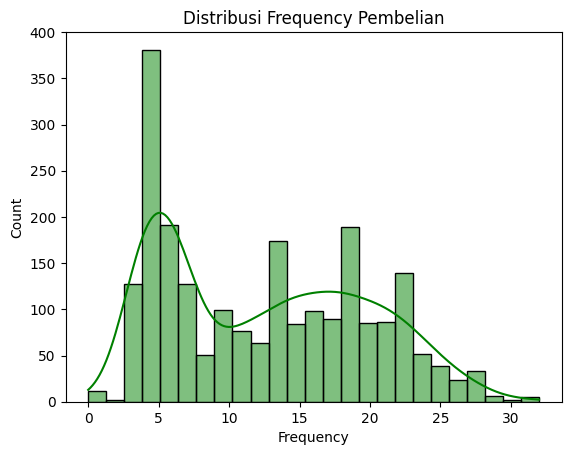

In [42]:
# Distribusi Frequency

sns.histplot(df_cleansing['Frequency'], bins=25, kde=True, color='green')
plt.title("Distribusi Frequency Pembelian")
plt.show()

Mayoritas pelanggan melakukan transaksi dalam jumlah rendah hingga menengah. Terlihat puncak frekuensi tertinggi berada pada kisaran 3–7 kali pembelian, yang menunjukkan bahwa sebagian besar pelanggan hanya membeli sesekali dan belum masuk kategori pelanggan aktif. Namun, terdapat sebagian pelanggan yang memiliki frekuensi pembelian tinggi (10–30 kali), meskipun jumlahnya relatif kecil.

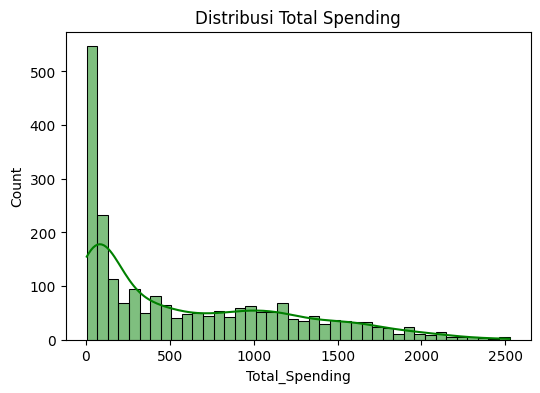

In [43]:
# Distribusi Monetary
plt.figure(figsize=(6,4))
sns.histplot(df_cleansing['Total_Spending'], bins=40, kde=True, color='green')
plt.title("Distribusi Total Spending")
plt.show()


sebagian besar pelanggan melakukan pembelian dalam jumlah kecil hingga moderat, sedangkan hanya sedikit pelanggan yang melakukan pembelian dalam nominal besar.

Mayoritas pelanggan memiliki frekuensi rendah dan total spending kecil, namun terdapat minoritas pelanggan bernilai tinggi yang memainkan peran penting dalam revenue. Distribusi Recency dan Length yang merata menunjukkan bahwa aktivitas pelanggan beragam—ada yang baru aktif, ada pula yang mendekati churn. Kondisi ini menjadikan segmentasi LRFM sangat relevan untuk memisahkan pelanggan berdasarkan nilai, aktivitas transaksi, dan potensi respon terhadap campaign

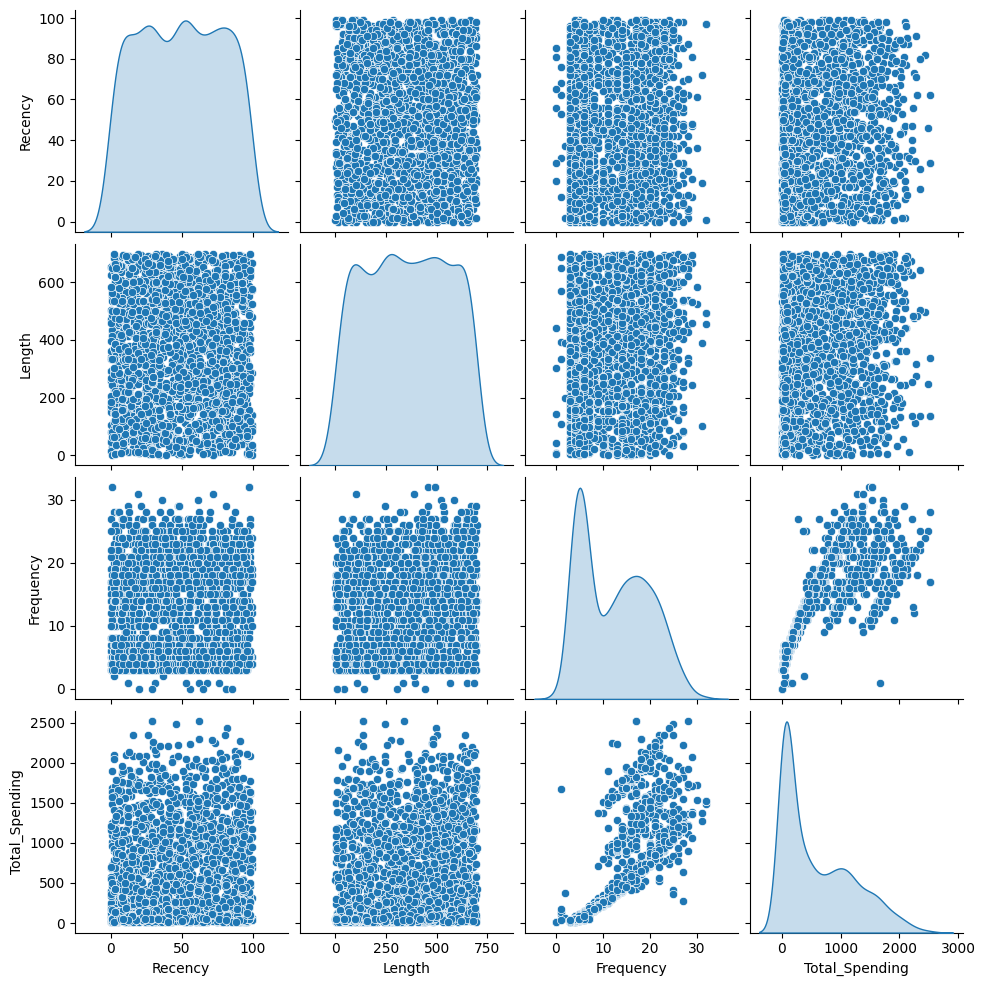

In [44]:
sns.pairplot(df_cleansing[['Recency','Length','Frequency','Total_Spending']], diag_kind='kde')


Ada pola keterkaitan variabel tidak merata, ada yang memiliki korelasi signifikan, ada juga yang saling independen. 

Scatterplot pada variabel Frequency dan (Monetary) Total SPending menunjukkan pola diagonal naik yang menandakan korelasi positif. Pelanggan yang lebih sering belanja cenderung berbelanja dengan total pengeluaran lebih besar. 

Di sisi lain, hubungan Monetary dengan Recency dan Length tidak menunjukkan pola yang sekuat Frequency. Penyebaran titik bersifat acak yang berarti belum tentu pelanggan lama memiliki nilai transaksi tinggi dan belum tentu juga pelanggan yang baru-baru ini berbelanja adalah high spender.

Ini menegaskan bahwa Frequency adalah variabel paling berpengaruh terhadap Monetary, sedangkan Recency dan Length tidak cukup untuk menilai nilai pelanggan secara langsung.

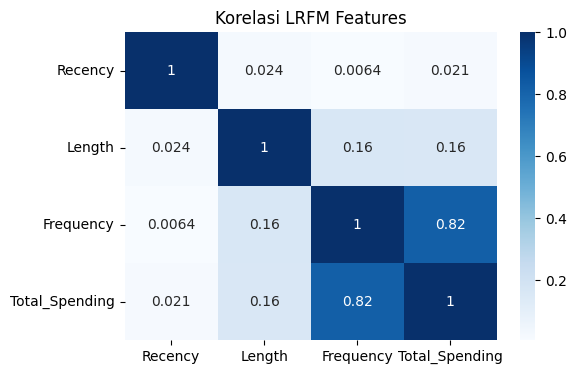

In [45]:
plt.figure(figsize=(6,4))
sns.heatmap(df_cleansing[['Recency','Length','Frequency','Total_Spending']].corr(), annot=True, cmap='Blues')
plt.title("Korelasi LRFM Features")
plt.show()


## Clustering Profiling

Persiapan Data LRFM. Data disalin ke variabel baru agar aman dan tidak mengganggu dataset. LRFM ini digunakan sebagai dasar segmentasi pelanggan.

In [46]:
LRFM = df_cleansing[['Length','Recency','Frequency','Total_Spending']].copy()


StandardScaler berfungsi menyetarakan skala antar fitur, karena setiap variabel memiliki satuan berbeda. Jika tidak distandarisasi, fitur dengan angka besar akan lebih dominan saat clustering.
Setelah scaling → semua fitur memiliki mean ≈ 0 dan standar deviasi ≈ 1 sehingga model lebih adil dan akurat.

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
LRFM_scaled = scaler.fit_transform(LRFM)

LRFM_scaled

array([[ 1.52979289,  0.30685572,  1.31207969,  1.6801763 ],
       [-1.19114282, -0.38397129, -1.18619751, -0.9622024 ],
       [-0.20665881, -0.7984675 ,  1.03449334,  0.28254077],
       ...,
       [-0.98336227,  1.44672029,  0.75690698,  1.0553119 ],
       [-0.97841512, -1.42021181,  1.17328652,  0.39388629],
       [ 1.3269595 , -0.31488859, -0.6310248 , -0.72123076]],
      shape=(2236, 4))

K-means clustering digunakan untuk mengelompokkan data yang tidak berlabel ke dalam beberapa kelompok berdasarkan kesamaan karakteristiknya.
K-means clustering adalah proses berulang untuk meminimalkan jumlah jarak antara titik-titik data dan pusat klusternya.

Menentukan Jumlah Cluster dengan Metode Elbow
Tujuan grafik ini adalah menemukan titik jumlah cluster terbaik — biasanya dilihat dari sudut tekukan grafik

[5623.537674426089, 4812.644651563365, 3892.136264518331, 3358.626092705611, 2879.8428050186876, 2561.933790544643, 2298.305925572308, 2136.4316544475314, 2063.9809571977944]


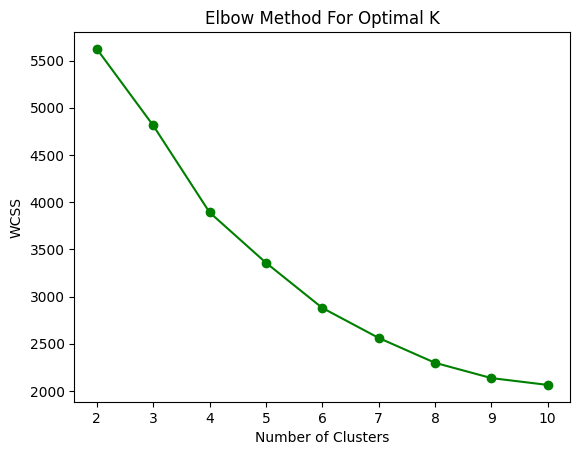

In [48]:
wcss = []
for i in range(2,11):   # coba dari 2 sampai 10 cluster
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(LRFM_scaled)
    wcss.append(kmeans.inertia_)
print(wcss)
plt.plot(range(2,11), wcss, marker='o', color='green')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [49]:
# Distribusi Pelanggan per Cluster menggunakan K = 5

kmeans = KMeans(n_clusters=5, random_state=42)
df_cleansing['Cluster'] = kmeans.fit_predict(LRFM_scaled)
print(df_cleansing['Cluster'].value_counts())

Cluster
2    530
0    467
3    433
1    423
4    383
Name: count, dtype: int64


In [50]:
# Visualisasi Distribusi Pelanggan per Cluster

import plotly.express as px

fig = px.histogram(df_cleansing, x='Cluster', color='Cluster',
                   title='Distribusi Pelanggan per Cluster', width=800, height=400,
                   text_auto=True)
fig.show()


WCSS (Within Cluster Sum of Squares) mengukur tingkat penyebaran data di dalam setiap klaster. Semakin kecil WCSS, semakin rapat dan mirip anggota dalam cluster tersebut. Metode ini mengukur jarak antara setiap observasi dan sentroid, lalu menghitung selisih kuadrat antara keduanya.
Penurunan WCSS paling besar terjadi di awal (k = 2 → k = 5).
Artinya pembagian cluster dari 2 sampai 5 memberikan improvement yang signifikan.

Setelah k = 5, grafik biasanya mulai flattening (penurunan melambat).
Hal ini menunjukkan bahwa menambah jumlah cluster tidak lagi meningkatkan kualitas secara signifikan.

Sehingga titik k = 5 secara teori adalah pilihan paling optimal.

Setelah menentukan jumlah cluster optimal menggunakan Elbow Method, model K-Means diterapkan dengan jumlah cluster sebanyak 5 cluster. Hasil segmentasi menunjukkan bahwa dataset dapat terbagi secara proporsional, dengan jumlah pelanggan di setiap cluster berkisar antara 383 hingga 530 pelanggan. Distribusi yang relatif merata ini mengindikasikan bahwa pembentukan cluster bersifat seimbang dan setiap segmen memiliki ukuran yang representatif untuk dianalisis lebih lanjut.

In [51]:
# LRFM Mean per Cluster

LRFM_mean = df_cleansing.groupby('Cluster')[['Recency','Length','Frequency','Total_Spending']].mean().round(2)

fig = px.imshow(
    LRFM_mean,
    text_auto=True,                     
    color_continuous_scale='YlGn',    
    aspect='auto',
    title='LRFM Mean per Cluster'
)

fig.update_layout(
    xaxis_title='Metrics',
    yaxis_title='Cluster',
    width=700,
    height=450
)

fig.show()


* Cluster 3 memiliki Recency paling tinggi atau sudah lama tidak belanja (72 hari), spendingnya rendah (143,3), dan Frequency rendah (6.98) --> **Churn-To-Be**
* Cluster 0 memiliki Recency paling rendah, artinya baru melakukan transaksii tapi Spending dan Frequency kecil --> **New Active**
* Cluster 4 memiliki Length paling tinggi (555 hari) yang berarti sudah lama jadi pelanggan, tapi Frequency rendah (7,81) dan Spending kecil --> **Passive long-term**
* Cluster 1 memiliki Frequency tinggi (aktif berbelanja), Spending tinggi, Recency sedang --> **Active Buyers**
* Cluster 2 memiliki Spending paling tinggi (high spender), Frequency tertinggi --> **High Value**

### Uji Statistik


Kita bisa buktikan dengan statistik inferensial, di mana hasil pengujian menunjukkan bahwa Cluster 2 memiliki nilai Spending dan Frequency secara signifikan lebih tinggi dibanding cluster lain, sementara Recency tidak menunjukkan perbedaan berarti. Pengujian dilakukan menggunakan Mann-Whitney U Test untuk membandingkan Total Spending, Frequency, dan Recency antara pelanggan High-Value Cluster (C2) dan cluster lainnya. Uji Mann-Whitney dipilih karena distribusi spending tidak normal secara visual dan lebih tepat digunakan dibanding uji parametrik seperti t-test.:

In [52]:
# MONETARY TEST

high_value = df_cleansing[df_cleansing['Cluster']==2]['Total_Spending']
others     = df_cleansing[df_cleansing['Cluster']!=2]['Total_Spending']

stat, p = mannwhitneyu(high_value, others, alternative='greater')

print("Mann-Whitney Statistic:", stat)
print("p-value:", p)

if p <= 0.05:
    print("Hasil: Tolak H0 → Spending cluster tinggi signifikan lebih besar.")
else:
    print("Hasil: Gagal tolak H0 → Spending tidak berbeda signifikan.")


Mann-Whitney Statistic: 806285.5
p-value: 3.4800325414154844e-164
Hasil: Tolak H0 → Spending cluster tinggi signifikan lebih besar.


In [53]:
# FREQUENCY TEST
freq_high  = df_cleansing[df_cleansing['Cluster']==2]['Frequency']
freq_other = df_cleansing[df_cleansing['Cluster']!=2]['Frequency']

stat_f, p_f = mannwhitneyu(freq_high, freq_other, alternative='greater')

print("Mann-Whitney Statistic:", stat_f)
print("p-value:", p_f)

if p_f <= 0.05:
    print("Hasil: Tolak H0 → Frequency cluster 2 signifikan lebih tinggi.")
else:
    print("Hasil: Gagal tolak H0 → Frequency cluster 2 tidak berbeda signifikan.")


Mann-Whitney Statistic: 796457.5
p-value: 8.660115774732044e-156
Hasil: Tolak H0 → Frequency cluster 2 signifikan lebih tinggi.


Hasil uji menunjukkan nilai p-value = 3.48 × 10⁻¹⁶⁴, yang jauh lebih kecil dari α = 0.05. Dengan demikian, H0 ditolak dan dapat disimpulkan bahwa pelanggan pada Cluster 2 memiliki Total Spending (Monetary) secara signifikan lebih tinggi dibanding pelanggan pada cluster lainnya.

Lalu pada Frequency Test, nilai p-value = 8.663 x 10⁻¹⁶⁴ yang jauh lebih kecil α = 0.05. Dengan demikian, H0 ditolak dan dapat disimpulkan bahwa pelanggan pada Cluster 2 memiliki Frequency secara signifikan lebih tinggi dibanding pelanggan pada cluster lainnya.

Bukti inferensial ini memperkuat hasil clustering bahwa Cluster 2 adalah segmen bernilai tertinggi (High Value Segment).

#### Profiling berdasarkan Demografi


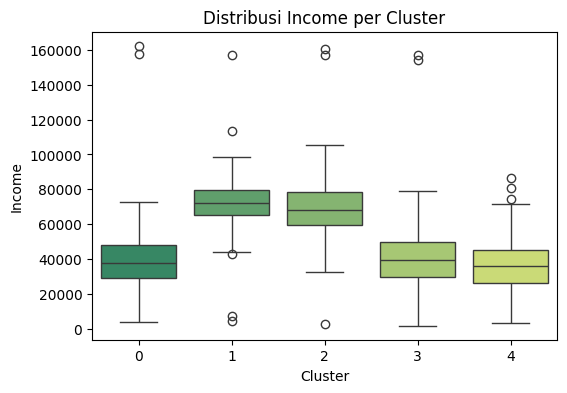

Cluster
0    38750.23
1    72105.52
2    68666.59
3    40255.04
4    35888.55
Name: Income, dtype: float64

In [54]:
# Distribusi Income per Cluster

plt.figure(figsize=(6,4))
sns.boxplot(x='Cluster', y='Income', data=df_cleansing, palette='summer')
plt.title('Distribusi Income per Cluster')
plt.show()
df_cleansing.groupby('Cluster')['Income'].mean().round(2)

* Cluster 1 & 2 adalah pelanggan dengan income terbesar dan memang spender terbesar
* Cluster 4 & 3 adalah pelanggan dengan income terendah dan spender terkecil

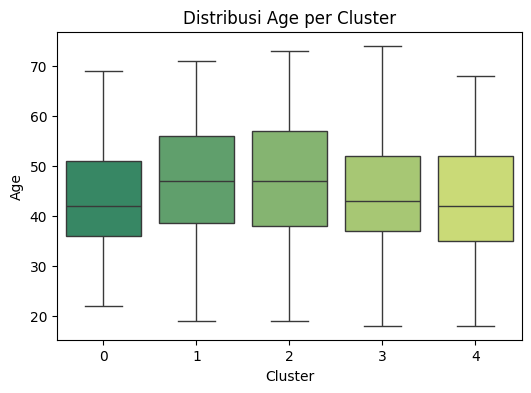

Cluster
0    43.398287
1    47.222222
2    46.890566
3    44.175520
4    43.409922
Name: Age, dtype: float64

In [55]:
# Distribusi Age per Cluster

plt.figure(figsize=(6,4))
sns.boxplot(x='Cluster', y='Age', data=df_cleansing, palette='summer')
plt.title('Distribusi Age per Cluster')
plt.show()
df_cleansing.groupby('Cluster')['Age'].mean()

Distribusi usia pelanggan di setiap cluster tidak menunjukkan perbedaan ekstrem, namun terdapat kecenderungan bahwa cluster 1 dan 2 memiliki rata-rata umur lebih tinggi dibandingkan cluster lain. Hal ini memberi indikasi bahwa kelompok usia matang memiliki tingkat engagement tertentu dalam belanja supermarket. Sementara cluster 0 dan 4 lebih didominasi pelanggan dengan rata-rata umur lebih muda. Temuan ini dapat digunakan sebagai pendukung strategi pemasaran berbasis segmentasi perilaku dan demografi.

In [56]:
# Distribusi Education by Cluster

fig = px.histogram(
    df_cleansing,
    x='Education',
    color='Cluster',
    barmode='group',        # group = berdampingan, relative = proporsi %
    text_auto=True,         # menampilkan nilai pada bar
    title='Distribusi Education by Cluster'
)

fig.update_layout(
    xaxis_title='Education Level',
    yaxis_title='Jumlah Customer',
    width=750,
    height=450,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    plot_bgcolor="white"
)

fig.show()


* Cluster 2 memiliki jumlah pelanggan Graduation (S1) tertinggi dan PhD cukup besar, menunjukkan profil pelanggan yang teredukasi

* Cluster 0 juga didominasi Graduation, dengan persentase Master dan PhD cukup tinggi 

* Cluster 1 memiliki distribusi pendidikan yang cukup seimbang namun Graduation tetap dominan 

* Cluster 3 memiliki Graduation tinggi tetapi 2n Cycle dan Basic lebih terlihat dibanding cluster lain

* Cluster 4 dominan Graduation namun memiliki proporsi Basic sedikit lebih besar dibanding cluster lain

In [57]:
fig = px.histogram(
    df_cleansing,
    x='Marital_Status',
    color='Cluster',
    barmode='group',        
    text_auto=True,         
    title='Marital Status by Cluster'
)

fig.update_layout(
    xaxis_title='Marital Status',
    yaxis_title='Jumlah Customer',
    width=750,
    height=450,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    plot_bgcolor="white"
)

fig.show()

* Cluster 2 memiliki jumlah pelanggan Married paling tinggi dan Single juga relatif besar

* Cluster 0 juga didominasi Married dan Together, dengan jumlah Single cukup tinggi

* Cluster 1 lebih seimbang antara Married, Single, dan Together

* Cluster 3 memiliki Married cukup tinggi namun Divorced juga besar

* Cluster 4 tetap dominan Married namun Together sedikit lebih rendah dan Basic household (Single) cukup terlihat 

In [58]:
kids = df_cleansing.groupby('Cluster')[['Kidhome','Teenhome']].mean().round(2)

fig = px.bar(
    kids,
    barmode='group',             # berdampingan Kidhome vs Teenhome
    title='Average Kids per Cluster',
    labels={'value': 'Rata-rata Anak', 'Cluster': 'Cluster', 'variable':'Kategori Anak'}
)

fig.update_layout(
    width=700,
    height=450,
    legend_title='Tipe Anak',
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    plot_bgcolor="white"
)

fig.show()


* Cluster 0 memiliki rata-rata jumlah anak (kid + teen) = 0.66 + 0.53 = 1.19 anak per keluarga artinya kebanyakan pelanggan keluarga dengan satu anak, jarang lebih dari 2
* Cluster 1 memiliki rata-rata jumlah anak (kid + teen) = 0.09 + 0.42 = 0.51 anak per keluarga artinya kebanyakan pelanggan keluarga dengan hampir tanpa anak
* Cluster 2 memiliki rata-rata jumlah anak (kid + teen) = 0.14 + 0.52 = 0.66 anak per keluarga artinya kebanyakan pelanggan keluarga dengan sedikit anak
* Cluster 3 memiliki rata-rata jumlah anak (kid + teen) = 0.72 + 0.57 = 1.29 anak per keluarga artinya kebanyakan pelanggan keluarga dengan paling banyak anak
* Cluster 4 memiliki rata-rata jumlah anak (kid + teen) = 0.68 + 0.49 = 1.17 anak per keluarga artinya kebanyakan pelanggan keluarga dengan satu anak, jarang lebih dari 2

#### Profiling berdasarkan Perilaku (Behavioral)

##### Response Campaign

In [59]:
# Response Campaign

df_cleansing.groupby('Cluster')[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].mean().round(3)


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
Cluster,,,,,,
0,0.009,0.004,0.081,0.021,0.000,0.158
1,0.163,0.028,0.095,0.142,0.187,0.154
2,0.128,0.028,0.072,0.138,0.155,0.266
3,0.007,0.000,0.048,0.025,0.000,0.007
4,0.000,0.003,0.068,0.034,0.003,0.133


Respons terhadap campaign terakhir
* Cluster 2 memiliki response terakhir tertinggi (0.266) dan acceptance yang cukup merata pada beberapa campaign
* Cluster 1 memiliki Acceptance kampanye 1, 3, 4, 5 tinggi, tetapi response terakhir tidak setinggi cluster 2
* Cluster 0 memiliki Response terakhir cukup tinggi (0.158) meski acceptance campaign sebelumnya rendah
* Cluster 4 memiliki Acceptance rendah di semua campaign, termasuk response terakhir
* Cluster 3 memiliki Acceptance paling rendah dan response terakhir hampir 0 (0.007)


Jika digabungkan hasil LRFM dan Respons Campaign, kita dapat menarik kesimpulan:
* Cluster 2 (High Value) adalah pelanggan dengan Frequency dan Monetary (spending) tertinggi dan paling responsif terhadap campaign
* Cluster 1 (Active Buyers) adalah pelanggan dengan Frequency dan Monetary (spending) tinggi dan responsif terhadap campaign
* Cluster 0 (New Active) adalah pelanggan dengan Recency rendah dan spending kecil, dan cukup responsif terhadap campaign 
* Cluster 4 (Passing Long-Term) adalah pelanggan lama dengan spending kecil, dan kurang responsif terhadap campaign
* Cluster 3 (Churn-To-Be) adalah pelanggan dengan Recency tertinggi dan spending rendah, dan hampir tidak responsif terhadap campaign  

##### Channel Purchase dan Diskon

In [60]:
df_cleansing.groupby('Cluster')[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']].mean().round(3)


,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Cluster,,,,,
0,2.197,2.546,0.762,3.803,6.137
1,1.785,5.605,5.163,8.418,3.090
2,2.730,6.281,5.109,8.619,4.717
3,2.127,2.492,0.767,3.721,5.781
4,2.747,3.060,0.979,3.768,7.094


* Cluster 2 paling aktif bertransaksi di semua channel → segmen paling potensial secara revenue.

* Cluster 1 dominan di Web & Store → cocok untuk loyalty program + omnichannel rewards.

* Cluster 0 & 4 sering mengunjungi website tetapi pembelian tidak terlalu tinggi → bisa di-target dengan promo retargeting & discount-based conversion.

* Cluster 3 paling rendah di semua aspek pembelian → termasuk passive/inactive buyer, perlu kampanye reaktivasi.

# Kesimpulan dan Rekomendasi

#### Kesimpulan

1. Analisis segmentasi pelanggan menggunakan metode LRFM (Length, Recency, Frequency, Monetary) menghasilkan 5 kelompok pelanggan utama. Segmentasi kemudian diperkaya dengan atribut demografi (Umur, Income, Pendidikan, Status Pernikahan, Jumlah Anak) dan respon kampanye pemasaran.

    - High Value (Cluster 2):
        1. Monetary (Total Spending) paling tinggi dan Frequency berbelanja paling tinggi
        2. Income terbesar setelah Active Buyers
        3. Rata-rata umur sedikit tinggi dibandingkan cluster lain
        4. Jumlah pelanggan Graduation (S1) tertinggi dan PhD cukup besar
        5. Jumlah pelanggan Married paling tinggi dan Single juga relatif besar
        6. Keluarga dengan saedikit anak
        7. Response campaign terakhir tertinggi dan acceptance yang cukup merata pada beberapa campaign
        8. Paling aktif bertransaksi di semua channel
        
    - Active Buyers (Cluster 1):
        1. Frequency tinggi (aktif berbelanja), Monetary tinggi, Recency sedang
        2. Income terbesar
        3. Rata-rata umur sedikit tinggi dibandingkan cluster lain
        4. Distribusi pendidikan yang cukup seimbang namun Graduation tetap dominan 
        5. Lebih seimbang antara Married, Single, dan Together
        6. Keluarga dengan hampir tanpa anak
        7. Acceptance kampanye 1, 3, 4, 5 tinggi, tetapi response terakhir tidak setinggi cluster 2
        8. Dominan di Web & Store

    - New Active (Cluster 0):
        1. Recency paling rendah, artinya baru melakukan transaksi tapi Monetary dan Frequency kecil
        2. Income rendah
        3. Rata-rata umur lebih muda dari Active Buyers dan High Value
        4. Didominasi Graduation, dengan persentase Master dan PhD cukup tinggi
        5. Didominasi Married dan Together, dengan jumlah Single cukup tinggi
        6. Keluarga dengan satu anak, jarang lebih dari 2
        7. Response terakhir cukup tinggi meski acceptance campaign sebelumnya rendah
        8. Sering mengunjungi website tetapi pembelian tidak terlalu tinggi
    
    - Passive Long-Term (Cluster 4):
        1. Length paling tinggi yang berarti sudah lama jadi pelanggan, tapi Frequency rendah dan Monetary kecil
        2. Income rendah
        3. Rata-rata umur lebih muda dari Active Buyers dan High Value
        4. Dominan Graduation namun memiliki proporsi Basic sedikit lebih besar dibanding cluster lain
        5. Dominan Married namun Together sedikit lebih rendah dan Basic household (Single) cukup terlihat
        6. Keluarga dengan satu anak, jarang lebih dari 2
        7. Acceptance rendah di semua campaign, termasuk response terakhir
        8. Sering mengunjungi website tetapi pembelian tidak terlalu tinggi

    - Churn-To-Be (Cluster 3)
        1. Recency paling tinggi atau sudah lama tidak belanja, spendingnya rendah, dan Frequency rendah
        2. Income rendah
        3. Rata-rata umur lebih muda dari Active Buyers dan High Value
        4. Graduation tinggi tetapi 2n Cycle dan Basic lebih terlihat dibanding cluster lain
        5. Married cukup tinggi namun Divorced juga besar
        6. Keluarga dengan paling banyak anak
        7. Acceptance paling rendah dan response terakhir hampir 0
        8. Paling rendah di semua aspek pembelian 

2. High Value dan Active Buyers adalah core cluster pendapatan bisnis, sedangkan New Active berpotensi tumbuh dan Churn-To-Be adalah risiko hilang pelanggan
3. Campaign acceptance tertinggi berada pada High Value dan Active Buyers, sementara Passive Long-Term dan Churn-To-Be hampir tidak memberikan respons.
4. Mayoritas pelanggan memiliki tingkat pendidikan Graduation (S1 ke atas). Ini menunjukkan pelanggan memiliki daya analisis dan cenderung merespons promo yang rasional dan jelas manfaatnya.
5. Dengan clustering ini, supermarkert AlfaIndo bisa mengetahui siapa yang paling memberi profit, menentukan campaign mana yang harus diprioritaskan, dan mengoptimalkan budget marketing




#### Rekomendasi

1. Fokuskan alokasi campaign dan program loyalitas ke Cluster High Value dan Active Buyers karena kedua segmen ini memberikan kontribusi spending terbesar dan memiliki respons kampanye yang baik. Dengan mengutamakan segmen yang paling menguntungkan, biaya promosi menjadi lebih efisien dan potensi revenue meningkat. 
2. Dorong New Active untuk naik kelas menjadi Active Buyers atau High Value. Segmen ini adalah early-stage customer sehingga masih mudah diarahkan untuk meningkatkan frekuensi dan nilai belanja.
3. Lakukan reactivation program untuk Passive Long-Term yang sudah lama menjadi pelanggan tetapi jarang melakukan pembelian.
4. Terapkan campaign yang agresif untuk Churn-To-Be (misalnya cashback besar) namun dalam batas tertentu. Jika dalam beberapa percobaan tetap tidak merespons, hentikan campaign untuk menghindari pemborosan anggaran.
5. Mengingat mayoritas pelanggan berpendidikan tinggi, materi marketing sebaiknya menonjolkan benefit, value, dan rasionalitas produk, bukan sekadar diskon harga.
6. Kampanye sebaiknya dibedakan per cluster dan tidak disamakan untuk seluruh pelanggan.
7. Jangan mengulangi Campaign 2 karena paling rendah response nya.
8. Campaign terakhir (Response) bisa dilakukan lagi karena Campaign ini adalah campaign dengan respons paling tinggi. Campaign 4 juga boleh dilakukan lagi.


In [61]:
df_cleansing.to_csv("cleaned_supermarket_customer.csv", index=False)
